In [ ]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from scipy import stats

In [ ]:
#IMPORTANDO OS DADOS
df=pd.read_csv('ex1data2.txt',sep=' ',header=None)
df.columns=['x1','x2','y']
#Adcionando o intercept
df.insert(loc=0, column='x0', value=1)

In [ ]:
#MOSTRANDO OS DADOS
df.head()

,x0,x1,x2,y
0,1,2.104,3,3.999
1,1,1.600,3,3.299
2,1,2.400,3,3.690
3,1,1.416,2,2.320
4,1,3.000,4,5.399


In [ ]:
#DEFININDO PARAMETROS
alfa= 0.01;
epocas=100;

w=np.random.randn(1, 3)[0]/100

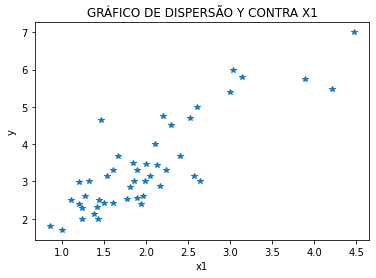

In [ ]:
#DISTRIBUIÇÃO DADOS
plt.plot(df.x1,df.y,'*')
plt.title('GRÁFICO DE DISPERSÃO Y CONTRA X1')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [ ]:
#ALGORITMO DO GRADIENTE DESCENDENTE ESTOCÁSTICO
data=df.values
eqm=[]
for i in range(epocas):
    np.random.shuffle(data)
    sum_eqm=0
    for instance in data:
        x=instance[0:3]
        y=instance[3]
        y_h=np.matmul(w,x)
        erro=y-y_h
        sum_eqm=sum_eqm+(erro*erro)
        w = w + alfa*erro*x
    eqm.append(sum_eqm/len(data))

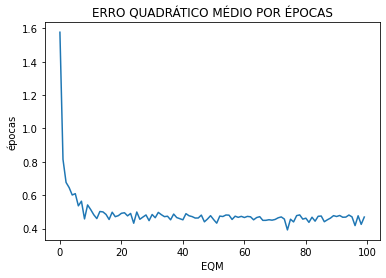

In [ ]:
#PLOT ERRO QUADRÁTICO MÉDIO
plt.plot(eqm)
plt.title('ERRO QUADRÁTICO MÉDIO POR ÉPOCAS')
plt.xlabel('EQM')
plt.ylabel('épocas')
plt.show()

In [ ]:
#NA MEDIDA QUE AS ÉPOCAS PASSAM O EQM DIMINUI, O QUE INDICA O APRENDIZADO.

In [ ]:
#MINIMOS QUADRADOS

data=df.values
x=data[:,0:3]
y=data[:,3]
w_ls=np.matmul(np.matmul(np.linalg.pinv(np.matmul(x.T,x)),x.T),y)

In [ ]:
#COMPARANDO COEFICIENTES

In [ ]:
#GRADIENTE DESCENDENTE ESTOCÁSTICO

w

array([ 0.80939365,  1.41224805, -0.03422376])

In [ ]:
#MINIMOS QUADRADOS

w_ls

array([ 0.8959791 ,  1.39210674, -0.08738019])

In [ ]:
#OS COEFICIENTES NÃO SÃO EXATAMENTES IGUAIS APESAR DE SEREM BEM PARECIDOS.DIFERENTEMENTE DO MÉTODO DOS MÍNIMOS
# QUADRADOS QUE ENCONTRA OS COEFICIENTES DA REGRESSÃO LINEAR EM UMA ÚNICA ETAPA, O ALGORITMO DO GRADIENTE DESCENDENTE
# ESTOCÁSTICO APRESENTARÁ RESULTADOS DIFERENTES SEMPRE QUE FOR EXECUTADO, UMA VEZ QUE UTILIZA ALEATÓRIAMENTE PORÇÕES
# DOS EXEMPLOS DE TREINO.

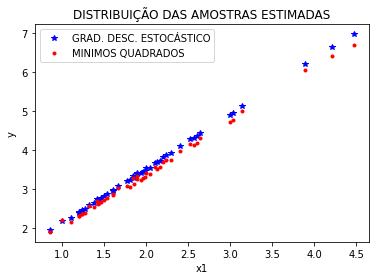

In [ ]:
#GRADIENTE DESCENDENTE ESTOCÁSTICO X MINIMOS QUADRADOS

fig = plt.figure()
ax = plt.subplot(111)
plt.plot(df.x1,np.matmul(df[['x0','x1','x2']].values,w),'b*',label='GRAD. DESC. ESTOCÁSTICO')
plt.plot(df.x1,np.matmul(df[['x0','x1','x2']].values,w_ls),'r.',label='MINIMOS QUADRADOS')
plt.title('DISTRIBUIÇÃO DAS AMOSTRAS ESTIMADAS')
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()
plt.show()